In [1]:
# 祖传代码引入
# 祖传代码引入
import sys
import cv2
print("OpenCV version:", cv2.__version__)
import matplotlib.pyplot as plt
import matplotlib
print("Matplotlib.Pyplot", matplotlib.__version__)
import numpy as np
print("Numpy version:", np.__version__)
import math

# 用于在 Jupyter Notebook 内部显示图片
%matplotlib inline    

def readRGB(filename: str):
    # 读入一个 RGB 图像
    blue, green, red = cv2.split( cv2.imread(filename) )
    return cv2.merge( (red, green, blue) )

def readGRAY(filename: str):
    # 读入一个单通道灰度图
    return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

def show(pic_1, pic_2=None, pic_3=None, msg_1="Ori", msg_2="PIC_2", msg_3="PIC_3"):
    # 未优化
    # 传入图片均为 灰度图像
    if pic_3 is None:
        if pic_2 is None:
            plt.figure(figsize=(10, 10))
            plt.imshow(pic_1, cmap='gray')
            plt.title(msg_1)
            plt.xticks([])
            plt.yticks([])
            return
        else:
            plt.figure(figsize=(10, 10))
            plt.subplot(121)
            plt.imshow(pic_1, cmap='gray')
            plt.title(msg_1)
            plt.xticks([])
            plt.yticks([])
            plt.subplot(122)
            plt.imshow(pic_2, cmap='gray')
            plt.title(msg_2)
            plt.xticks([])
            plt.yticks([])
    else:
        plt.figure(figsize=(10, 10))
        plt.subplot(131)
        plt.imshow(pic_1, cmap='gray')
        plt.title(msg_1)
        plt.xticks([])
        plt.yticks([])
        plt.subplot(132)
        plt.imshow(pic_2, cmap='gray')
        plt.title(msg_2)
        plt.xticks([])
        plt.yticks([])
        plt.subplot(133)
        plt.imshow(pic_3, cmap='gray')
        plt.title(msg_3)
        plt.xticks([])
        plt.yticks([])
    plt.savefig('CV_TEST.png', dpi=500)

OpenCV version: 4.5.5
Matplotlib.Pyplot 3.5.1
Numpy version: 1.22.2


In [2]:
def my_calcHist(pic):
    row, col = pic.shape
    y = np.zeros((256, ))
    for i in range(row):
        for j in range(col):
            y[pic[i][j] - 1] += 1
    return y

In [3]:
from ipywidgets import interact
import ipywidgets as widgets

# 如有需要请直接修改传入的 file_name:str
# 动态展示一条横线上的灰度值变化

test = readGRAY('lena.png')
row, col = test.shape
width = 3

def f(x):
    y = test[x].copy()
    img = test.copy()
    
    mask = np.zeros((row, col), dtype=np.uint8)
    mask[x - width : x + width, :] = 255
    
    img = cv2.add(mask, img)
    
    plt.figure(figsize=(8, 8))
    plt.subplot(212)
    plt.plot(y); plt.xticks([0, col - 1]); plt.yticks([0, 255]); plt.title("Gray Value")

    plt.subplot(211)
    plt.imshow(img, cmap='gray'); plt.xticks([]); plt.yticks([]); plt.title("Selected Line")
    return

interact(f, x = widgets.IntSlider(min=width, max=row-width, step=1, value=int(np.divide(row, 2))))

interactive(children=(IntSlider(value=716, description='x', max=1429, min=3), Output()), _dom_classes=('widget…

<function __main__.f(x)>

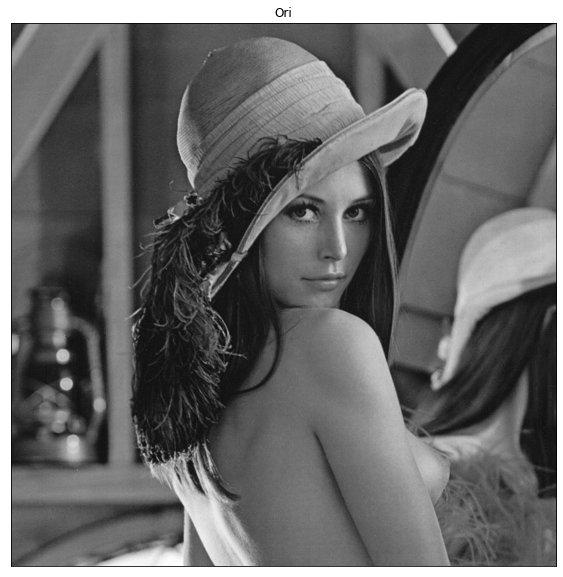

In [4]:
lena_gray = readGRAY('lena.png')
show(lena_gray)

## 椒盐噪声

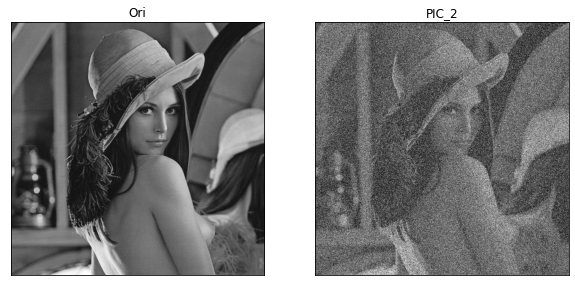

In [5]:
def my_noise_salt(pic):
    row, col = pic.shape
    img = pic.copy()
    num = np.divide(col, 3)
    for i in range(row):
        random_white = np.random.randint(0, col - 1, (1, int(num)))
        random_black = np.random.randint(0, col - 1, (1, int(num)))
        for j in range(int(num)):
            img.itemset(i, random_white.item(j), 255)
        for j in range(int(num)):
            img.itemset(i, random_black.item(j), 0)
    return img

lena_salt = my_noise_salt(lena_gray); show(lena_gray, lena_salt) # test

In [6]:
test = lena_salt.copy()
row, col = test.shape
width = 3

def f(x):
    y = test[x].copy()
    img = test.copy()
    
    mask = np.zeros((row, col), dtype=np.uint8)
    mask[x - width : x + width, :] = 255
    
    img = cv2.add(mask, img)
    
    plt.figure(figsize=(8, 8))
    plt.subplot(212)
    plt.scatter(range(col), y); plt.xticks([0, col - 1]); plt.yticks([0, 255]); plt.title("Gray Value")

    plt.subplot(211)
    plt.imshow(img, cmap='gray'); plt.xticks([]); plt.yticks([]); plt.title("Selected Line")
    return

interact(f, x = widgets.IntSlider(min=width, max=row-width, step=1, value=int(np.divide(row, 2))))

interactive(children=(IntSlider(value=716, description='x', max=1429, min=3), Output()), _dom_classes=('widget…

<function __main__.f(x)>

## 脉冲噪声

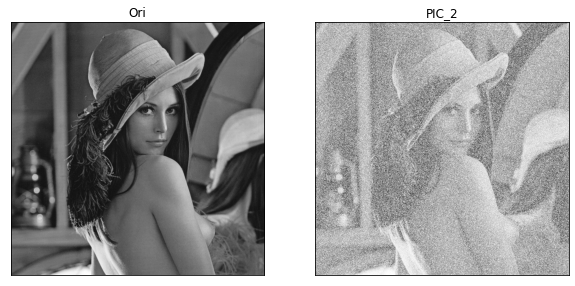

In [7]:
def my_noise_impulse(pic):
    row, col = pic.shape
    img = pic.copy()
    rand_mat = np.random.randint(0, 2, (row, col), dtype=np.uint8)
    for i in range(row):
        for j in range(col):
            if rand_mat.item(i, j) == 1:
                img.itemset(i, j, 255)
    return img

lena_imp = my_noise_impulse(lena_gray); show(lena_gray, lena_imp) # test

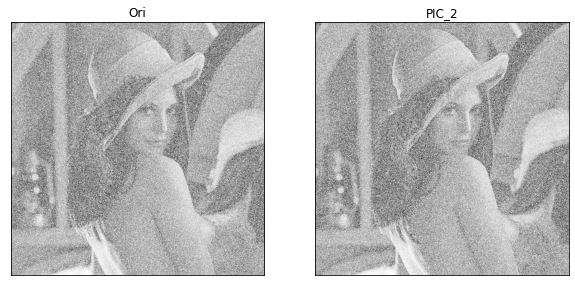

In [8]:
def my_noise_impulse_2(pic):
    row, col = pic.shape
    rand_mat = np.random.choice([0, 255], (row, col))
    return pic + rand_mat

lena_imp_2 = my_noise_impulse(lena_gray); show(lena_imp, lena_imp_2) # test

In [9]:
test = lena_imp.copy()
row, col = test.shape
width = 3

def f(x):
    y = test[x].copy()
    img = test.copy()
    
    mask = np.zeros((row, col), dtype=np.uint8)
    mask[x - width : x + width, :] = 255
    
    img = cv2.add(mask, img)
    
    plt.figure(figsize=(10, 10))
    plt.subplot(212)
    plt.scatter(range(col), y); plt.xticks([0, col - 1]); plt.yticks([0, 255]); plt.title("Gray Value")

    plt.subplot(211)
    plt.imshow(img, cmap='gray'); plt.xticks([]); plt.yticks([]); plt.title("Implulse Noise")
    return

interact(f, x = widgets.IntSlider(min=width, max=row-width, step=1, value=int(np.divide(row, 2))))

interactive(children=(IntSlider(value=716, description='x', max=1429, min=3), Output()), _dom_classes=('widget…

<function __main__.f(x)>

## 高斯噪声

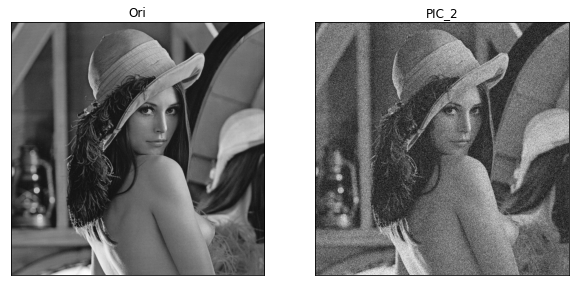

In [10]:
def my_noise_gaussian(pic, mu, sigma, k):
    row, col = pic.shape
    img = pic.copy()
    
    for i in range(row):
        for j in range(col):
            
            rand = np.random.randn()
            noise = mu + np.multiply(rand, sigma)
            noise = k * noise
            
            temp = pic[i][j] + noise
            
            if temp > 255:
                temp = 255
            elif temp < 0:
                temp = 0
                
            img[i][j] = temp
    return img

lena_gauss = my_noise_gaussian(lena_gray, 0, 1, 64); show(lena_gray, lena_gauss) # test

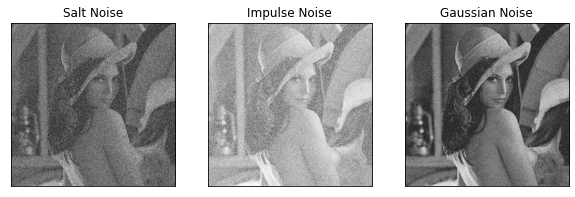

In [11]:
show(lena_salt, lena_imp, lena_gauss, "Salt Noise", "Impulse Noise", "Gaussian Noise")

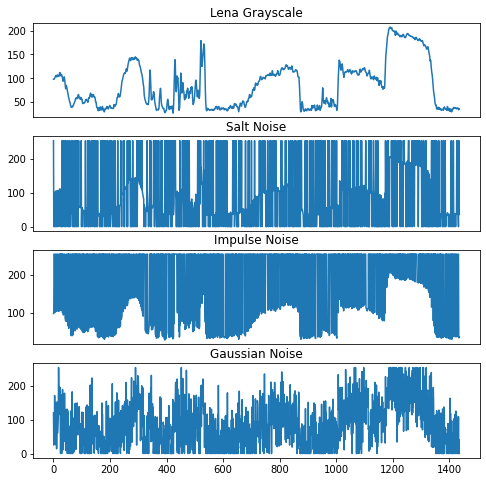

In [12]:
y_1 = lena_gray[716]
y_2 = lena_salt[716]
y_3 = lena_imp[716]
y_4 = lena_gauss[716]
hist_list = [y_1, y_2, y_3, y_4]
legend_list = ["Lena Grayscale", "Salt Noise", "Impulse Noise", "Gaussian Noise"]
plt.figure(figsize=(8, 8))
for i in range(4):
    plt.subplot(4, 1, i + 1)
    plt.plot(hist_list[i]); plt.title(legend_list[i])
    if i != 3:
        plt.xticks([]);
# lena_gray
# lena_salt
# lena_imp
# lena_gauss

## 滑窗小技巧

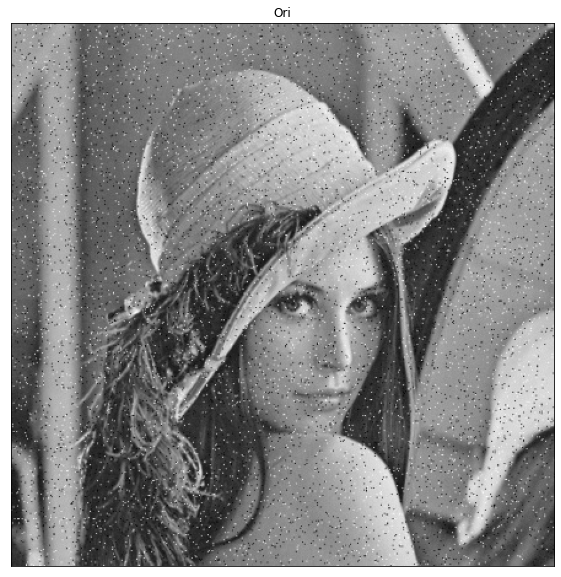

In [13]:
lena_noise = readGRAY('lena_noise.png')
show(lena_noise)

In [16]:
def filter_mean(pic, winsize):
    if winsize % 2 != 1:
        print("Windows size must be odd number.")
        return
    step = int(winsize / 2)
    row, col = pic.shape
    row_i, col_i = (row - winsize + 1, col - winsize + 1)
    Img = np.zeros((row_i, col_i), dtype=np.uint8)
    
    for i in range(step , row - step ):
        for j in range(step , col - step ):
            temp = pic[(i - step): (i + step + 1), (j - step ):( j + step + 1)]
            
            # 窗口操作如下
            sum = np.int32(np.sum(temp))
            mean = np.uint8(sum / (winsize*winsize))
            Img.itemset(i - step, j - step, mean)
            # print(i, j, " ", i - step, i + step, " ", j - step, j + step, " ", pic[i][j], " ", sum, mean)
    return Img

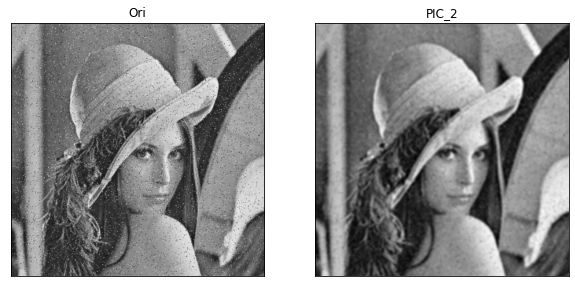

In [20]:
lena_noise_mean = filter_mean(lena_noise, 5)
show(lena_noise, lena_noise_mean)

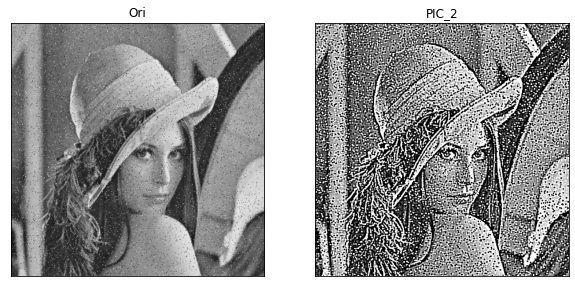

In [27]:
kernel_5x5 = np.array([
    [-1, -1, -1, -1, -1],
    [-1, 1, 2, 1, -1],
    [-1, 3, 4, 2, -1],
    [-1, 1, 2, 1, -1],
    [-1, -1, -1, -1, -1]
])

dst = cv2.filter2D( src=lena_noise, ddepth=-1, kernel=kernel_5x5 , anchor=(-1, -1))
show(lena_noise, dst)

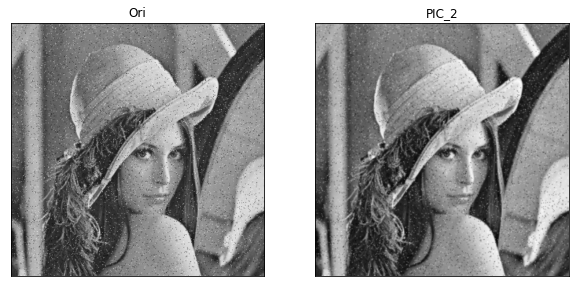

In [28]:
kernel_5x5 = np.array([
    [1, 2, 1],
    [2, 8, 2],
    [1, 2, 1]
])

kernel_5x5 = kernel_5x5 / np.sum(kernel_5x5)

dst = cv2.filter2D( src=lena_noise, ddepth=-1, kernel=kernel_5x5 , anchor=(-1, -1))
show(lena_noise, dst)